In [3]:
import numpy as np
import pandas as pd

import os

In [39]:
path = os.getcwd()

fish_df = pd.read_csv(path + r"\data\db1\ref\fish.csv", error_bad_lines=False, sep=';')
prod_designate_df = pd.read_csv(path + r"\data\db1\ref\prod_designate.csv", error_bad_lines=False, sep=';')
prod_type_df = pd.read_csv(path + r"\data\db1\ref\prod_type.csv", error_bad_lines=False, sep=';')
regime_df = pd.read_csv(path + r"\data\db1\ref\regime.csv", error_bad_lines=False, sep=';')
region_df = pd.read_csv(path + r"\data\db1\ref\region.csv", error_bad_lines=False, sep=';')


catch_df = pd.read_csv(path + r'\data\db1\catch.csv', error_bad_lines=False, sep=',')

# Подмена данных + нормализация
def spoofing(id):
    return fish_df[fish_df['id_fish'] == id]['fish'].values[0]
catch_df['id_fish'] = catch_df['id_fish'].apply(spoofing)
catch_df['catch_volume'] = catch_df['catch_volume']*1000

product_df = pd.read_csv(path + r'\data\db1\product.csv', error_bad_lines=False, sep=',')

ext1 = pd.read_csv(path + r"\data\db2\Ext.csv", error_bad_lines=False, sep=',')
ext2 = pd.read_csv(path + r"\data\db2\Ext2.csv", error_bad_lines=False, sep=',')

In [5]:
# Сводная таблица по всем поступлениям согласно IdFish и выбранного промежутка времени.
def calculatingSummOfFish(fish_id, date_start, date_end):
    # смотрим по всем выловам этой рыбы
    data = catch_df[catch_df['id_fish'] == fish_id]
    # уникальные номера кораблей ловящих только эту рыбу
    ships = list(set(data['id_ves'].to_list()))
    
    # создаю датафрейм с владельцами и выловом по судам    
    total_df = pd.DataFrame()
    
    total_ships = []
    total_owners = []
    total_catches = []
    
    # добавляем в общую кашу дату и документируем владельцев
    for ship in ships:
        ship_data = data[data['id_ves'] == ship]
        owners = list(set(ship_data['id_own'].to_list()))
        
        for owner in owners:
            ship_owner_data = ship_data[ship_data['id_own'] == owner]
            
            try:
                ship_owner_end_data = ship_owner_data[ship_owner_data['date'] < date_end]
                ship_owner_start_end_data = ship_owner_end_data[ship_owner_end_data['date'] > date_start]
                total_catch = ship_owner_start_end_data['catch_volume'].sum()
            except e:
                print(e)
            
            if total_catch > 0:
                total_catches.append(total_catch)
                total_ships.append(ship)
                total_owners.append(owner)
            
    total_df['total_catches'] = total_catches
    total_df['ship'] = total_ships
    total_df['owner'] = total_owners
    
    return total_df

<AxesSubplot:>

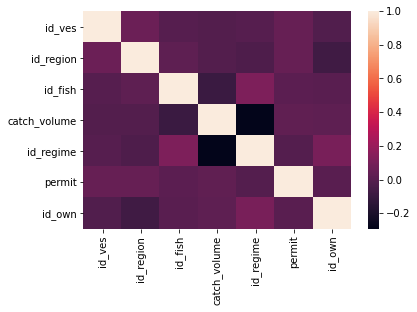

In [6]:
import seaborn as sns
sns.heatmap(catch_df.corr())

<AxesSubplot:>

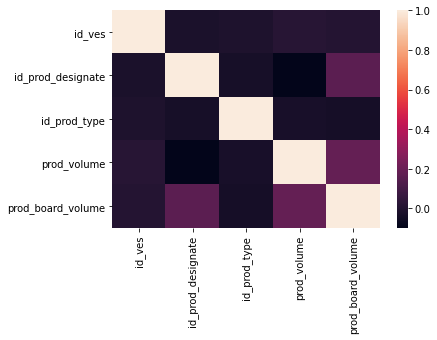

In [12]:
sns.heatmap(product_df.corr())